<a href="https://colab.research.google.com/github/ivangtorre/Curso_CRIDA_2022/blob/main/CRIDA_2022_Ejercicio_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST Classification using Deep Neural Network with Pytorch and with a Fully Connected layer

<a title="By Josef Steppan [CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0)], from Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:MnistExamples.png"><img width="512" alt="MnistExamples" src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png"/></a>


In [ ]:
# First install Pytorch
!pip install torch
!pip install torchvision

In [ ]:
# Import libraries
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt

## MNIST Dataset
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.



In [ ]:
train_data = dsets.MNIST(root = './data', train = True, transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False, transform = transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Define Hyperparameters
batch_size = 100 # the size of input data took for one iteration
input_size = 784 # img_size = (28,28) ---> 28*28=784 in total **** DO NOT MODIFY
hidden_size = 500 # number of nodes at hidden layer
num_classes = 10 # number of output classes discrete range [0,9] ** DO NOT MODIFY
num_epochs = 20 # number of times which the entire dataset is passed throughout the model
lr = 1e-3 # size of step 

In [ ]:
#Load the data
train_gen = torch.utils.data.DataLoader(dataset = train_data, batch_size = batch_size, shuffle = False)
test_gen = torch.utils.data.DataLoader(dataset = test_data, batch_size = batch_size, shuffle = False)

## Visualize the dataset
When we run the code, we will get the greyscale visualization of the MNIST images

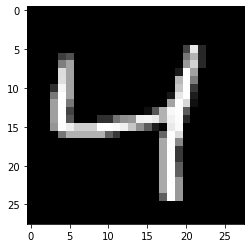

In [ ]:
plt.imshow(train_data[2][0][0], cmap='gray')

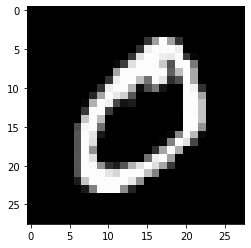

In [ ]:
plt.imshow(train_data[1][0][0], cmap='gray')


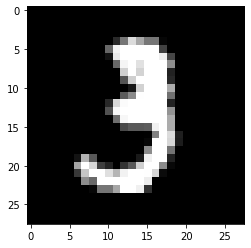

In [ ]:
plt.imshow(train_data[10][0][0], cmap='gray')


# DEFINING A NEURAL NETWORK IN PYTORCH
Deep learning uses artificial neural networks (models), which are computing systems that are composed of many layers of interconnected units. By passing data through these interconnected units, a neural network is able to learn how to approximate the computations required to transform inputs into outputs. In PyTorch, neural networks can be constructed using the torch.nn package.

There are two requirements for defining the Net class of your model. The first is writing an __init__ function that references nn.Module. This function is where you define the fully connected layers in your neural network.

When you use PyTorch to build a model, you just have to define the forward function, that will pass the data into the computation graph (i.e. our neural network). This will represent our feed-forward algorithm.



In [ ]:
# Define model class

class Net(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  
  def forward(self,x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

Our network is composed of one input layer, a hidden layer, an activatión function and output layer. 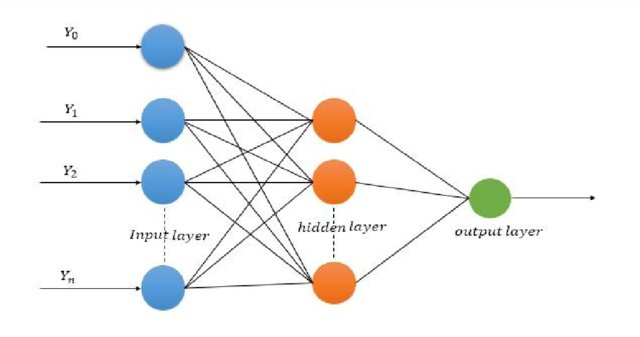

On the following we can visualize the structure of the Deep Neural Network that we have just built.

In [ ]:
# Build the Model
net = Net(input_size, hidden_size, num_classes)
if torch.cuda.is_available():
  net.cuda()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=300, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=300, out_features=10, bias=True)
)


In [ ]:
#Define loss-function & optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam( net.parameters(), lr=lr)

## Training the model
It is now time to train the model. During training all images will be input into the DNN during one epoch. The objetive is to minimize a loss function (Cross Entropy) between the output and the ground truth. The errors are backpropagated and the optimizer adjust the parameters of the DNN in order to search an optimal solution. Usually the more epochs we train, the better model we will get (although overfitting could happen)

In [ ]:
#Training the model

for epoch in range(num_epochs):
  for i ,(images,labels) in enumerate(train_gen):
    images = Variable(images.view(-1,28*28)).cuda()
    labels = Variable(labels).cuda()
    
    optimizer.zero_grad()
    outputs = net(images)
    loss = loss_function(outputs, labels)
    loss.backward()
    optimizer.step()
    
  print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' %(epoch+1, num_epochs, i+1, len(train_data)//batch_size, loss.data))

Epoch [1/20], Step [600/600], Loss: 0.2044
Epoch [2/20], Step [600/600], Loss: 0.1851
Epoch [3/20], Step [600/600], Loss: 0.1422
Epoch [4/20], Step [600/600], Loss: 0.1498
Epoch [5/20], Step [600/600], Loss: 0.1196
Epoch [6/20], Step [600/600], Loss: 0.0785
Epoch [7/20], Step [600/600], Loss: 0.1234
Epoch [8/20], Step [600/600], Loss: 0.0453
Epoch [9/20], Step [600/600], Loss: 0.0412
Epoch [10/20], Step [600/600], Loss: 0.0449
Epoch [11/20], Step [600/600], Loss: 0.0289
Epoch [12/20], Step [600/600], Loss: 0.0601
Epoch [13/20], Step [600/600], Loss: 0.0143
Epoch [14/20], Step [600/600], Loss: 0.0483
Epoch [15/20], Step [600/600], Loss: 0.0024
Epoch [16/20], Step [600/600], Loss: 0.0975
Epoch [17/20], Step [600/600], Loss: 0.0125
Epoch [18/20], Step [600/600], Loss: 0.0011
Epoch [19/20], Step [600/600], Loss: 0.0153
Epoch [20/20], Step [600/600], Loss: 0.0010


## Evaluation of the model. 
The model has decreased the loss during the training, but Loss is not a very intuitive metric. We will first evaluate the metric on the training set.

In [ ]:
# Training accuracy 
correct = 0
total = 0
for images,labels in train_gen:
  images = Variable(images.view(-1,28*28)).cuda()
  labels = labels.cuda()
  
  output = net(images)
  _, predicted = torch.max(output,1)
  correct += (predicted == labels).sum()
  total += labels.size(0)

print('Training Accuracy of the model: %.3f %%' %((100*correct)/(total+1)))

Training Accuracy of the model: 99.658 %


## Evaluation on the test set
Check the overfitting!

In [ ]:
#Evaluating the accuracy of the model

correct = 0
total = 0
for images,labels in test_gen:
  images = Variable(images.view(-1,28*28)).cuda()
  labels = labels.cuda()
  
  output = net(images)
  _, predicted = torch.max(output,1)
  correct += (predicted == labels).sum()
  total += labels.size(0)

print('Accuracy of the model: %.3f %%' %((100*correct)/(total+1)))

Accuracy of the model: 98.030 %


## Now is your turn. Some things you can try:

*   Modify the batch size. The batch size is a number of samples processed before the model is updated. 
*   Modify the number of epochs. The number of epochs is the number of complete passes through the training dataset.
*   Modify the learning rate. The learning rate controls how quickly the model is adapted to the problem
*   Try adding new hidden Fully Connected layers and activation functions. Be careful with the size of each layer as they must be consistent. Save the original Neural Network before doing this implementations.



